# Self Organizing Maps - Análise

In [1]:
from minisom import MiniSom
from sklearn.datasets import make_blobs
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.gridspec import GridSpec


## Importando a base Iris

In [91]:
iris = pd.read_csv("Iris.csv")
iris.sample(5)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
68,69,6.2,2.2,4.5,1.5,Iris-versicolor
87,88,6.3,2.3,4.4,1.3,Iris-versicolor
59,60,5.2,2.7,3.9,1.4,Iris-versicolor
134,135,6.1,2.6,5.6,1.4,Iris-virginica
119,120,6.0,2.2,5.0,1.5,Iris-virginica


## EDA da Base Irís

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

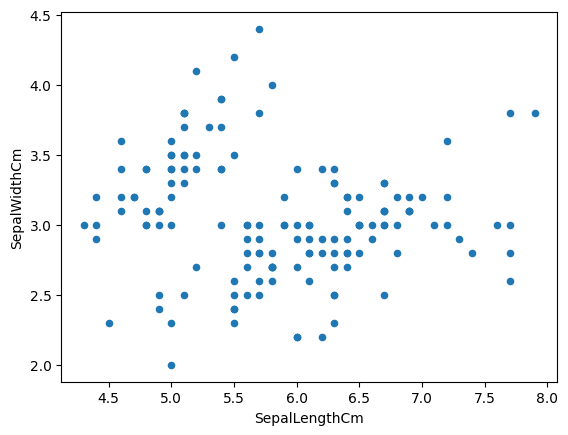

In [92]:
iris.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm')


Para melhor visualizar a separação das espécies, vamos utilizar a biblioteca seaborn

/home/joaocosentino/.pyenv/versions/lewagon/lib/python3.10/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


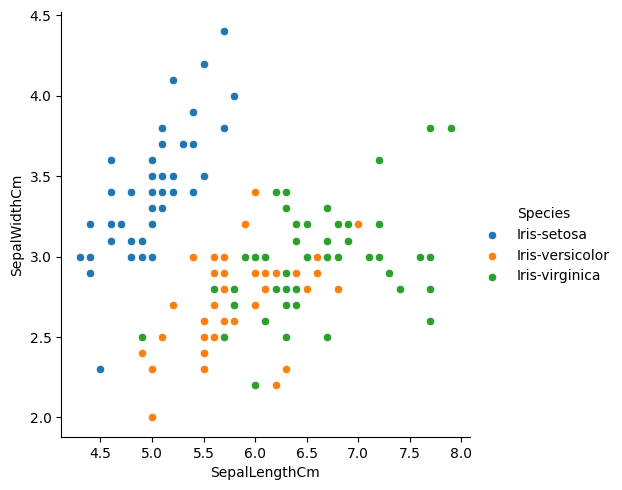

In [93]:
sns.FacetGrid(iris,hue="Species",size=5).map_dataframe(sns.scatterplot,'SepalLengthCm',"SepalWidthCm").add_legend()


## Preparação dos dados

In [94]:
X = iris.drop(columns=["Id",'Species'],axis=1)
y = iris["Species"]


In [95]:
from sklearn.preprocessing import MinMaxScaler
X = pd.DataFrame(MinMaxScaler().fit_transform(X.values))
X.sample(5)


,0,1,2,3
64,0.361111,0.375000,0.440678,0.500000
132,0.583333,0.333333,0.779661,0.875000
52,0.722222,0.458333,0.661017,0.583333
90,0.333333,0.250000,0.576271,0.458333
119,0.472222,0.083333,0.677966,0.583333


O tamanho do grid ou mapa, é definido a partir do tamanho de amostras, tendo como cálculo a seguinte abordagem:
 -  grid = 5*sqrt(numero de amostras)
 - No nosso caso temos: 5 * sqrt{150} -> aprox = 64 ou 8x8

In [118]:
X.shape[0]


150

In [105]:
data = X.to_numpy()
som = MiniSom(8, 8, X.shape[1], sigma=1.5, learning_rate=0.5,
              neighborhood_function='gaussian')
som.train_random(data, num_iteration=1000,verbose=True)


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.07135593473987996


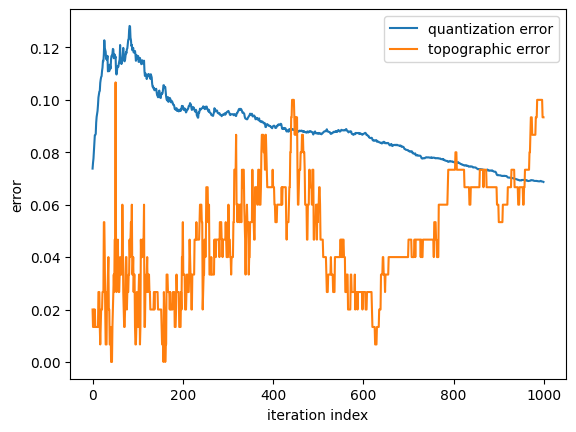

In [106]:
max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('error')
plt.xlabel('iteration index')
plt.legend()
plt.show()


In [123]:
y.astype('category').cat.codes


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8

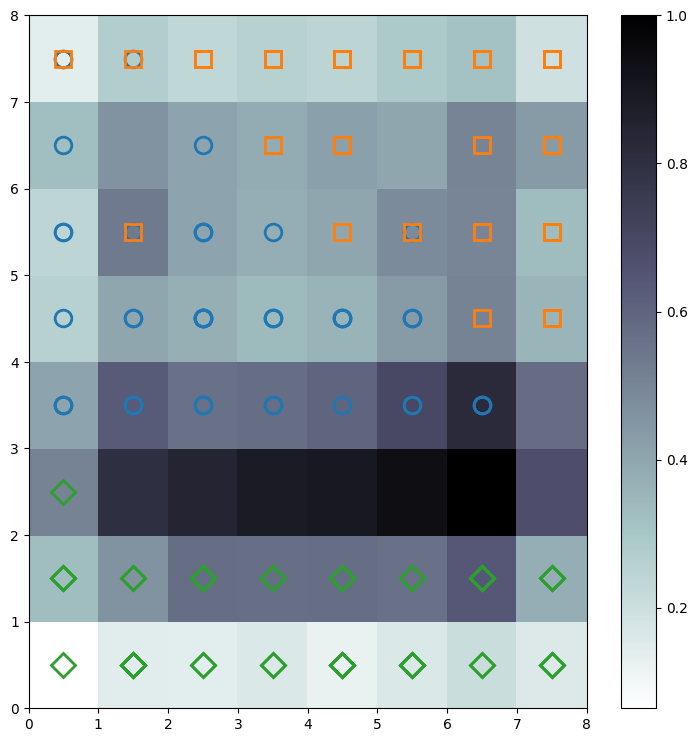

In [107]:
%matplotlib inline

plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

c = y.astype('category').cat.codes
labels_map = som.labels_map(data, y)
label_names = np.unique(y)


# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[c[cnt]-1], markerfacecolor='None',
             markeredgecolor=colors[c[cnt]-1], markersize=12, markeredgewidth=2)

plt.show()


Pelo mapa acima podemos ver que a definição de separação dos clusters se mantem na correlação dentre os pesos dos ***weight vectors*** e de suas BMUs. 

E se fizermos uma comparação coma  visualização dos dados, fica claro também a correlação entre as classes **versicolor** e **virginica** e sua separação clara da **setosa**

### Sobreposição da relaçãos dos weight vectors e do conjunto de dados

In [108]:
weights = som.get_weights()


In [120]:
data.shape


(150, 4)

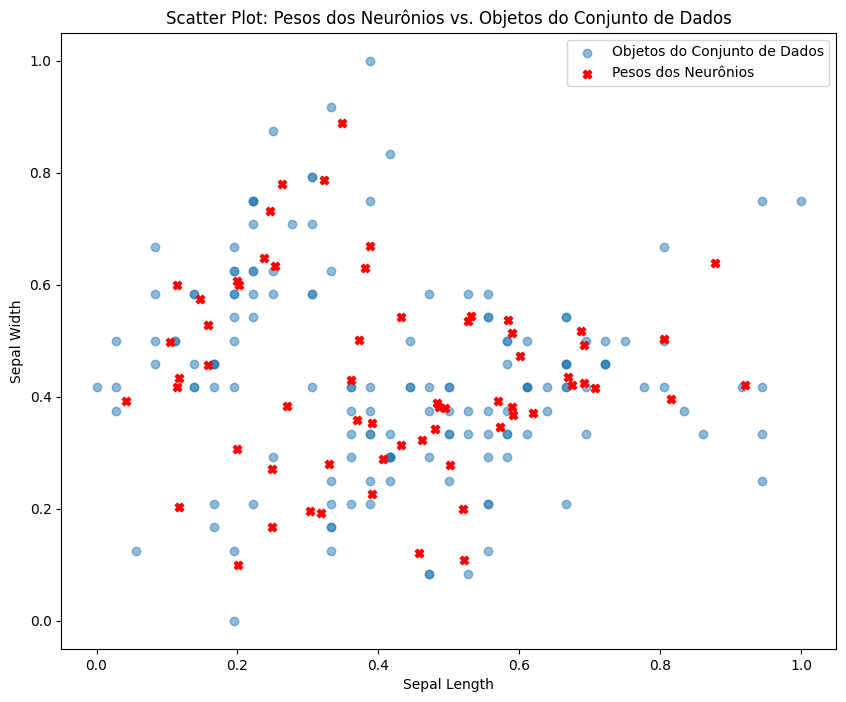

In [116]:
data_dim1 = data[:, 0] # Sepal Length
data_dim2 = data[:, 1] # Sepal Width
data_dim3 = data[:, 2] # Petal length
data_dim4 = data[:, 3] # Petal width

weights_dim1 = weights[:, :, 0].flatten()
weights_dim2 = weights[:, :, 1].flatten()
weights_dim3 = weights[:, :, 2].flatten()
weights_dim4 = weights[:, :, 3].flatten()

plt.figure(figsize=(10, 8))
plt.scatter(data_dim1, data_dim2, label='Objetos do Conjunto de Dados', alpha=0.5)
plt.scatter(weights_dim1, weights_dim2, label='Pesos dos Neurônios', marker='X', color='red')
plt.title('Scatter Plot: Pesos dos Neurônios vs. Objetos do Conjunto de Dados')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()
